# 最適ポートフォリオ

時点$T$の株価を$S(T)$とすると、**リターン**は

$$
R=\frac{S(T)-S(0)}{S(0)}
$$

**期待リターン**は

$$
\mu = E[R]
$$

**ボラティリティ**は

$$
\sigma = \sqrt{Var(R)}
$$

と定義される。

ボラティリティの大きさを**リスク**という。

## 2資産モデル

$(\mu_1, \sigma_1) = (0.1, 0.1)$と$(\mu_2, \sigma_2) = (0.4, 0.3)$の2銘柄でのポートフォリオを考える

In [261]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

# stock 1
mu1, sigma1 = (0.1, 0.1)
# stock 2
mu2, sigma2 = (0.4, 0.3)

mu = np.array([mu1, mu2])
sigma = np.array([sigma1, sigma2])

ポートフォリオの期待リターンは

$$
\mu_P = \boldsymbol{\pi} ^\top  \boldsymbol{\mu}
$$

（ここで$\boldsymbol{\pi} = (\pi_1, \pi_2)^\top, \hspace{1em} \boldsymbol{\mu} = (\mu_1, \mu_2)^\top$）

ポートフォリオのボラティリティは

$$
\sigma_P = 
\sqrt{
  \boldsymbol{\pi}^\top \Sigma \boldsymbol{\pi}
}
$$

ここで$\Sigma$は共分散行列

$$
\Sigma =
\begin{pmatrix}
\sigma^2_1 & \sigma_1 \sigma_2 \rho_{1,2}\\
\sigma_1 \sigma_2 \rho_{2, 1} & \sigma_2^2
\end{pmatrix}
$$

In [262]:
def Sigma(rho):
    """共分散行列。ρ_{2,1} = ρ_{1,2}の想定"""
    return np.array([
        [sigma1**2, sigma1 * sigma2 * rho],
        [sigma1 * sigma2 * rho, sigma2**2],
    ])

Sigma(rho=.1)

array([[0.01 , 0.003],
       [0.003, 0.09 ]])

In [263]:
# ポートフォリオ・ウェイト（値は適当）
pi = np.array([0.5, 0.5])

# ポートフォリオの期待リターン
mu_P = pi.T @ mu

# ポートフォリオのボラティリティ
sigma_P = np.sqrt(pi.T @ Sigma(rho=.1) @ pi)

これらを使って、ポートフォリオ・ウェイトや銘柄間の相関係数を変えながらプロットすると以下のようになる

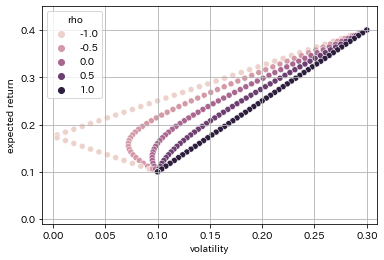

In [264]:
import itertools
mu_Ps = []
sigma_Ps = []
rhos = []

# ポートフォリオ・ウェイトの組み合わせ
pi1 = np.linspace(0, 1, 51)
pi2 = 1 - pi1
pi_range = np.array([pi1, pi2])

# 相関係数
# rho_range = np.linspace(-1, 1, 21)
rho_range = [-1, -.5, 0, .5, 1]

# 変数を変えていったときのポートフォリオのボラティリティ
for pi, rho in itertools.product(pi_range.T, rho_range):
    mu_P = pi.T @ mu  # ポートフォリオの期待リターン
    sigma_P = np.sqrt(pi.T @ Sigma(rho) @ pi)  # ポートフォリオのボラティリティ
    
    mu_Ps.append(mu_P)
    sigma_Ps.append(sigma_P)
    rhos.append(rho)
    

mu_Ps = np.array(mu_Ps)
sigma_Ps = np.array(sigma_Ps)
rhos = np.array(rhos)

# plot
fig, ax = plt.subplots()
sns.scatterplot(
    x="sigma", y="mu", hue="rho",
    data = pd.DataFrame({"mu": mu_Ps, "sigma": sigma_Ps, "rho": rhos}),
    ax=ax
)
ax.set(xlabel="volatility", ylabel="expected return", xlim=[-0.01, 0.31], ylim=[-0.01, 0.45])
ax.grid(True)
fig.show()

ここからの含意：

1. 高い期待リターンを狙えばボラティリティも高くなる
2. 期待リターンを下げすぎてもボラティリティが高くなる（$\rho < 1$のとき）

## 危険資産のみのポートフォリオの最適化

3資産以上になると、投資可能集合は線ではなく面になる。この面を実行可能領域とよぶ。

実現可能領域を包む境界線を**平均分散フロンティア**（mean variance frontier）といい、その上半分を「平均分散フロンティアの効率パート」、略して**効率的フロンティア**と呼ぶ。（下半分は低い期待リターンに対してボラティリティが高いため合理的ではない）

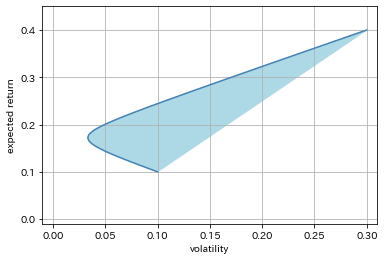

In [265]:
# # 曲線を描こうとしたがうまくいかなかった残骸

# def frontier(sigma_P, rho, mu=mu):
#     """-1 < ρ < 1 のときの平均分散フロンティアの曲線"""
#     ones = np.ones(shape=(len(mu), ))
#     A = mu.T @ np.linalg.inv(Sigma(rho)) @ mu
#     B = ones.T @ np.linalg.inv(Sigma(rho)) @ mu
#     C = ones.T @ np.linalg.inv(Sigma(rho)) @ ones

#     D = (sigma_P ** 2 / (1 / C))
#     mu_P =  np.sqrt( ((A * C - B ** 2) / C ** 2) * (1 + D) ) + (B / C)
#     return mu_P

# mu_P_hats = []
# sigma_Ps = []

# # 相関係数
# rho_range = np.linspace(-0.9, 0.9, 21)
# # rho_range = [-0.9, -.5, 0, .5, 0.9]

# # 変数を変えていったときのポートフォリオのボラティリティ
# for pi, rho in itertools.product(pi_range.T, rho_range):
#     # mu_P = pi.T @ mu  # ポートフォリオの期待リターン
#     sigma_P = np.sqrt(pi.T @ Sigma(rho) @ pi)  # ポートフォリオのボラティリティ

#     mu_P_hat = frontier(sigma_P, rho)
#     mu_P_hats.append(mu_P_hat)
#     sigma_Ps.append(sigma_P)


# fig, ax = plt.subplots()
# ax.scatter(sigma_Ps, mu_P_hats)


# plot ------------------------------------
rows = []

# 相関係数
rho_range = [-0.9]

# 変数を変えていったときのポートフォリオのボラティリティ
for pi, rho in itertools.product(pi_range.T, rho_range):
    mu_P = pi.T @ mu  # ポートフォリオの期待リターン
    sigma_P = np.sqrt(pi.T @ Sigma(rho) @ pi)  # ポートフォリオのボラティリティ
    rows.append({"mu": mu_P, "sigma": sigma_P, "rho": rho})
data = pd.DataFrame(rows)

# plot
fig, ax = plt.subplots()
ax.plot(data["sigma"], data["mu"], color="steelblue")
ax.fill(data["sigma"], data["mu"], color="lightblue")
ax.set(xlabel="volatility", ylabel="expected return", xlim=[-0.01, 0.31], ylim=[-0.01, 0.45])
ax.grid(True)
fig.show()

## 安全資産を含むポートフォリオの最適化



In [266]:
# # safe asset
# mu0, sigma0 = (0.05, 0.0)
# # stock 1
# mu1, sigma1 = (0.4, 0.3)

# mu = np.array([mu0, mu1])
# sigma = np.array([sigma0, sigma1])

# import itertools
# mu_Ps = []
# sigma_Ps = []
# rhos = []

# # ポートフォリオ・ウェイトの組み合わせ
# pi1 = np.linspace(0, 1, 51)
# pi2 = 1 - pi1
# pi_range = np.array([pi1, pi2])

# # 相関係数
# # rho_range = np.linspace(-1, 1, 21)
# rho_range = [-1, -.5, 0, .5, 1]

# # 変数を変えていったときのポートフォリオのボラティリティ
# for pi, rho in itertools.product(pi_range.T, rho_range):
#     mu_P = pi.T @ mu  # ポートフォリオの期待リターン
#     sigma_P = np.sqrt(pi.T @ Sigma(rho) @ pi)  # ポートフォリオのボラティリティ
    
#     mu_Ps.append(mu_P)
#     sigma_Ps.append(sigma_P)
#     rhos.append(rho)
    

# mu_Ps = np.array(mu_Ps)
# sigma_Ps = np.array(sigma_Ps)
# rhos = np.array(rhos)

# # plot
# fig, ax = plt.subplots()
# sns.scatterplot(
#     x="sigma", y="mu", hue="rho",
#     data = pd.DataFrame({"mu": mu_Ps, "sigma": sigma_Ps, "rho": rhos}),
#     ax=ax
# )
# ax.set(xlabel="volatility", ylabel="expected return", xlim=[-0.01, 0.31], ylim=[-0.01, 0.45])
# ax.grid(True)
# fig.show()

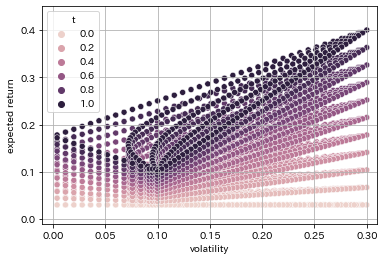

In [267]:
# safe asset
mu0, sigma0 = (0.03, 0.0)

# risk asset only portfolios
risk_Ps = pd.DataFrame({"mu": mu_Ps, "sigma": sigma_Ps, "rho": rhos})

# 危険資産ポートフォリオへのウェイトt
ts = np.linspace(0, 1, 11)

results = []
for t in ts:
    for _, row in risk_Ps.iterrows():
        mu_P = t * row["mu"] + (1 - t) * mu0
        sigma_P = row["sigma"]
        results.append({"mu": mu_P, "sigma": sigma_P, "t": t})

results = pd.DataFrame(results).drop_duplicates()

# plot
fig, ax = plt.subplots()
sns.scatterplot(
    x="sigma", y="mu", hue="t",
    data=results,
    ax=ax
)
ax.set(xlabel="volatility", ylabel="expected return", xlim=[-0.01, 0.31], ylim=[-0.01, 0.45])
ax.grid(True)
fig.show()

危険資産だけからなる平均分散フロンティアと危険資産に安全資産を加えたポートフォリオの効率的フロンティアの接点のポートフォリオを**接点ポートフォリオ**（tangency portfolio）という。

接点ポートフォリオのポートフォリオ・ウェイトは

$$
\hat{\boldsymbol{\pi}} = \frac
{\Sigma^{-1} (\boldsymbol{\mu} - \mu_0 \boldsymbol{1})}
{\boldsymbol{1}^\top \Sigma^{-1} (\boldsymbol{\mu} - \mu_0 \boldsymbol{1})}
$$

である

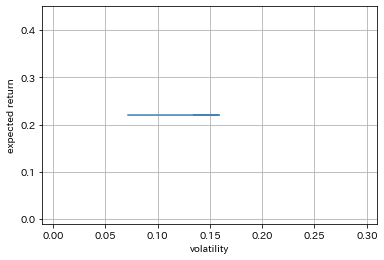

In [268]:
rows = []

# 相関係数
rho_range = [-0.9, 0.5, 0]

for rho in rho_range:
    # 接点ポートフォリオのウェイト
    s = np.linalg.inv(Sigma(rho=0.1)) @ (mu - mu0 * ones)
    pi = s / (ones.T @ s)

    mu_P = pi.T @ mu  # ポートフォリオの期待リターン
    sigma_P = np.sqrt(pi.T @ Sigma(rho) @ pi)  # ポートフォリオのボラティリティ

    rows.append({"mu": mu_P, "sigma": sigma_P, "rho": rho})
data = pd.DataFrame(rows)

# plot
fig, ax = plt.subplots()
ax.plot(data["sigma"], data["mu"], color="steelblue")
ax.fill(data["sigma"], data["mu"], color="lightblue")
ax.set(xlabel="volatility", ylabel="expected return", xlim=[-0.01, 0.31], ylim=[-0.01, 0.45])
ax.grid(True)
fig.show()

接点ポートフォリオの期待リターンは$\hat{\mu}_P = \hat{\boldsymbol{\pi}}^\top \boldsymbol{\mu}$、接点ポートフォリオのボラティリティは$\hat{\sigma}_P = \sqrt{ \hat{\boldsymbol{\pi}}^\top \Sigma \hat{\boldsymbol{\pi}} }$、接点ポートフォリオのシャープ・レシオは$\hat{\kappa}_P = \frac{\hat{\mu}_P - \mu_0}{\hat{\sigma}_P}$である。

効率的フロンティアは切片が$\mu_0$、傾きが$\hat{\kappa}_P$なので平均分散フロンティアは

$$
\mu_P = \mu_0 + \hat{\kappa}_P \sigma_P
$$

となる。

合理的な投資家は効率的フロンティア上でポートフォリオを組みたいと考えるはずなので、シャープ・レシオは全員同じ値になると考えられる。危険資産を組み替えれば平均分散フロンティアの形状は変わり接点ポートフォリオの位置も変わるため、シャープ・レシオは変わる。**シャープ・レシオを改善するためには組み込む危険資産の構成を工夫するしかない**

目標とする期待リターンとそれに対応するボラティリティは上の平均分散フロンティア上にあるので、上の式は次のように書くこともできる

$$
\mu_P = t \hat{\mu}_P + (1 - t) \mu_0
$$

$t=1$ならポートフォリオの期待リターン$\mu_P$は接点ポートフォリオのそれと等しくなり、$t=0$なら安全資産の利回りそのものになる。

### トービンの分離定理

最適な安全資産ポートフォリオ・ウェイトは$\pi_0^{**} = 1 - t$、
最適な危険資産のポートフォリオ・ウェイトは$\boldsymbol{\pi}^{**} = t \hat{\boldsymbol{\pi}}$
となる。

ポートフォリオの期待リターン$\mu_P$は投資家の選好によって変わり、それに応じて$t$も変わる。

危険資産のポートフォリオ・ウェイトを決める作業は選好とは関係なく決まる。
投資家の選好に応じて変わるのは、ポートフォリオ全体の目標期待リターンを定める作業。
このことは**トービンの分離定理**（separation theorem）と言われる（Tobin 1958）。

## 参考
吉川 大介（2022）『データ駆動型ファイナンス』、共立出版。